# Contexto e Introdução

## Contexto Geral, Objetivo Técnico da Atividade

#### Nesse atividade irei trabalhar com um dataset relacionado à psicologia para construir um modelo de classificação binária usando Keras. O objetivo será prever se um indivíduo é introvertido ou extrovertido com base em diversas características.

## Psicologia, Extroversão e Introversão

#### O conceito de introversão e extroversão é amplamente utilizado nos dias de hoje. Um sujeito recluso e que não gosta gosta de falar é caracterizado por muitos como introvertido e aquele falante, que não fecha a matraca, é caracterizado com extrovertido.

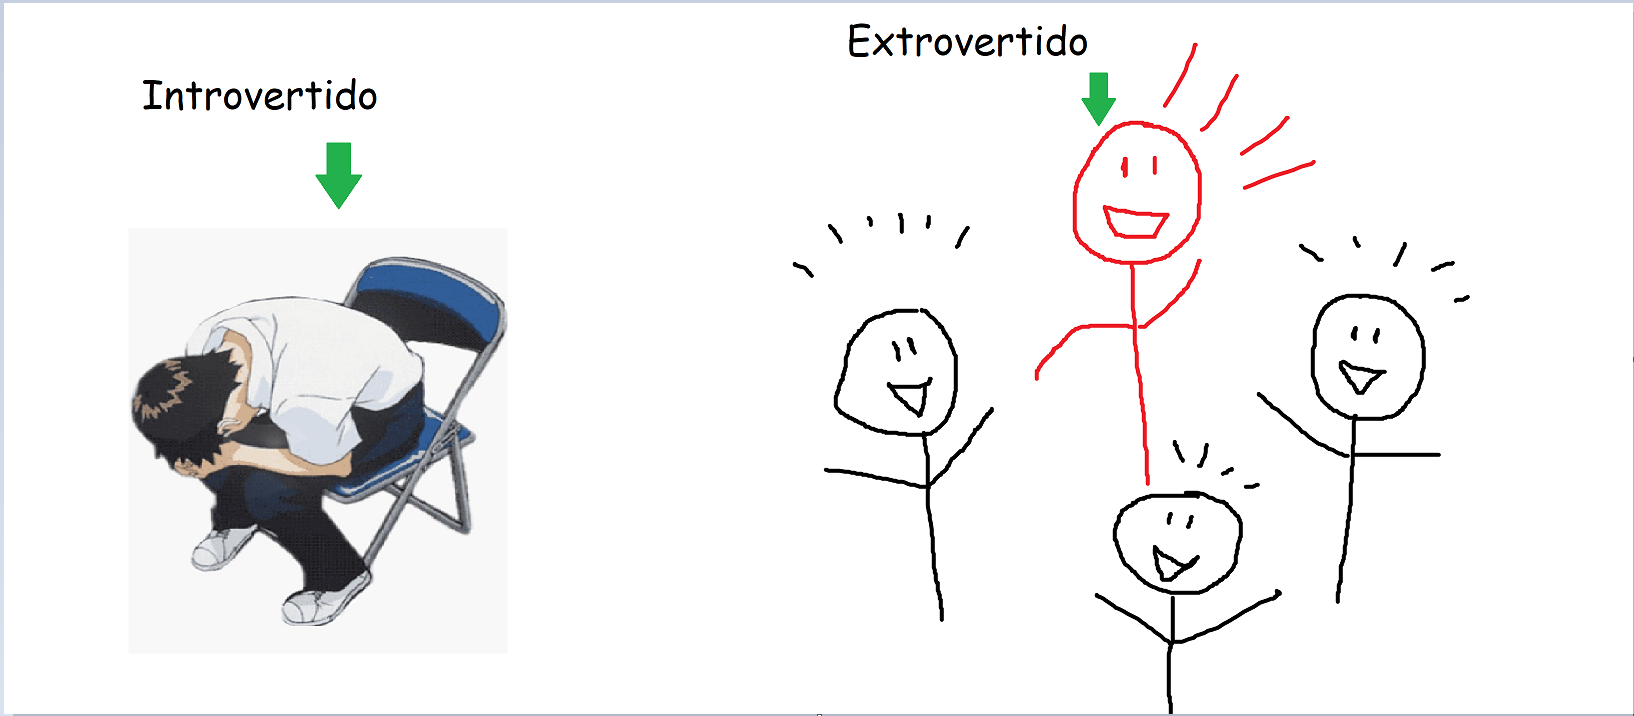

Como muito dos conceitos que se massificam, ele está completamente deturpado. Não se pode confundir introversão com timidez. Conforme a Associação de Psicologia Americana, "a timidez é a tendência de se sentir estranho, preocupado ou tenso durante encontros sociais, especialmente com pessoas desconhecidas". Nessa descrição, é possível concluir que a timidez mais se aproxima de uma condição do que um traço de personalidade em si. Exatamente por não não estar diretamente relacionado à personalidade, acabará havendo casos de introvertidos tímidos, de extrovertidos tímidos, de introvertidos não tímidos e de extrovertidos não tímidos.


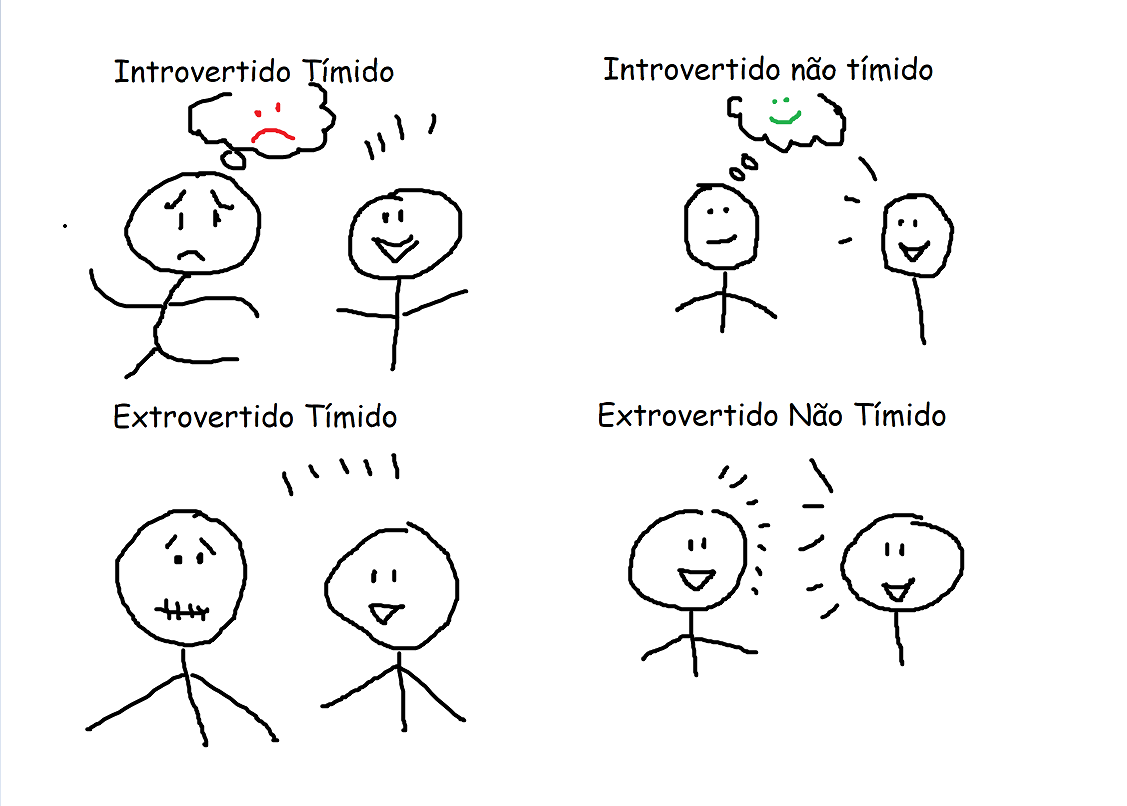

O **introvertido tímido** não interaje bem nas conversas e de forma alguma queria estar naquela interação social, ele não consegue se concentrar em pensamentos internos pois está muito focado em si mesmo e na situação "desajustada que se encontra". O **introvertido não tímido** consegue se concentrar nos seus pensamentos durante uma conversa, constribuindo pontualmmente com observações e comentários. O **extrovertido tímido** se sente muito travado, ele gostaria muito de participar daquela corversa e interagir de forma constante, mas de alguma forma se sente preso. O **extrovertido não tímido** tem uma alta participação na conversa, com constantes observações e comentários durante todo o diálogo, ele se sente muito bem durante toda a conversa.


#### Em suma, timidez está associado à uma condição de ansiedade social, é uma desordem que não pode ser diretamente associada à timidez (mesmo que na maioria dos casos essas duas características se encontrem juntas).



#### Uma correção popular ao que é extroversão e introversão está associadoao ao "carregamento de baterias". Introvertidos recarregam suas energias em solidão e os Extrovertidos em companhia. Ambos desempenham atividades de solidão e comunidade, contudo, uns perdem e outros ganham energia em cada um dos cenários.

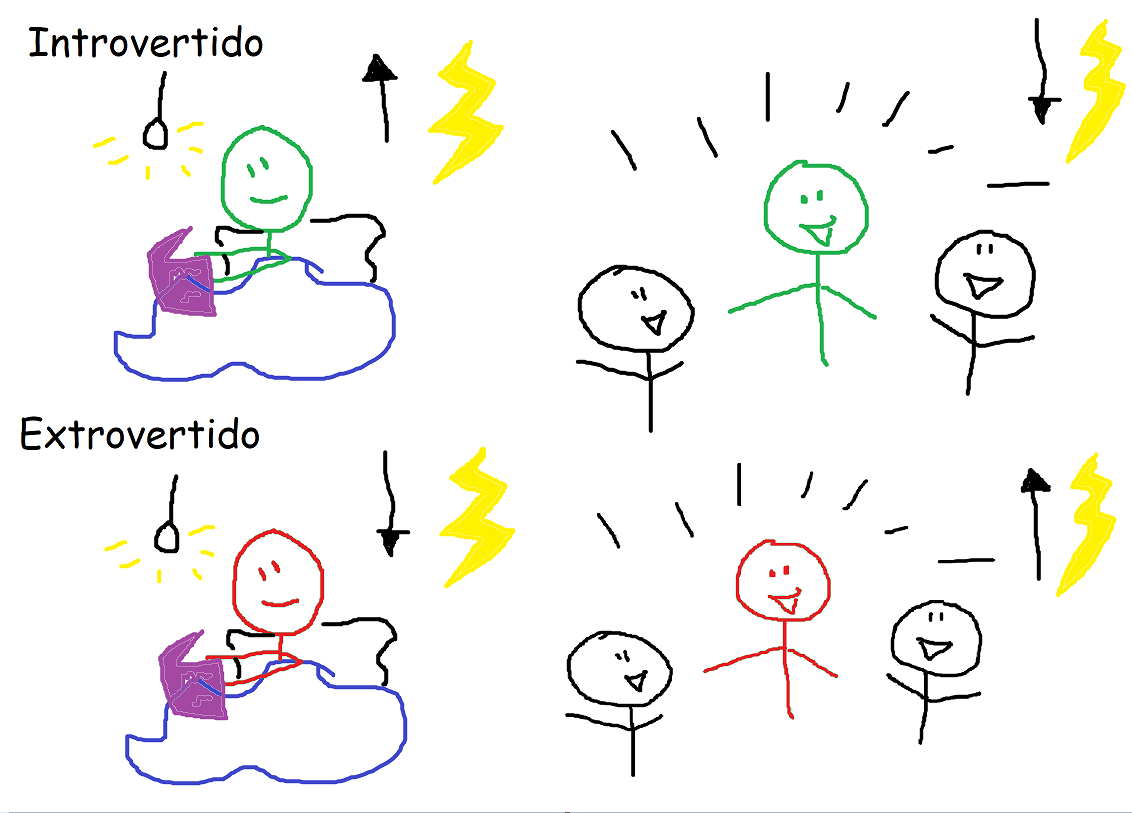

#### Também podem haver graus de introversão e extroversão, se muito equlibrados, a pessoa pode ser chamada de ambivertida. Essa caracterização foi feita por Carl Jung (criador incluse do conceito de introversão e extroversão), contudo, observei que as pessoas utilizam essa opção como fuga de uma possível caracterização: "Não sou um introvertido estranho nem um extrovertido incoveniente, estou além do bem e do mal, sou um ser 100% equilibrado".

#### Saber se você é introvertido ou extrovertido propõe um nível de autoconhecimento que te permita identicar seus limites, pontos fortes e fracos, uma oportunidade para se desafiar e melhorar.

#### Os níveis de extroversão e introversão também criam desafios nas amizades e, especialmente, nos relacionamentos.  O extrovertido pode ver o introvertido como tedioso, muito recluso, "só sabe ficar em casa". Já o introvertido pode ver o extrovertido como incoveniente, incessante, "que sai demais".

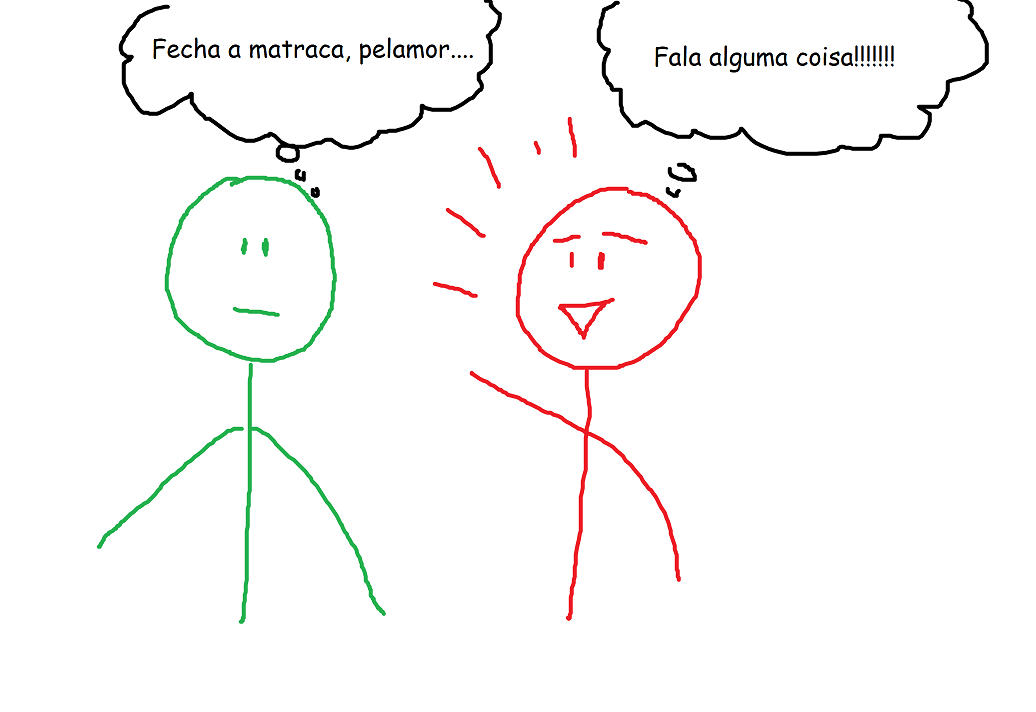

# 1.Entendimento do Dataset

O dataset contém informações detalhadas sobre currículos de candidatos, incluindo anos de experiência, nível educacional, número de habilidades, projetos, idiomas conhecidos, certificações, publicações, atividades extracurriculares, workshops assistidos e papéis de liderança. A variável alvo é a personalidade do candidato, classificada como extrovertido ou introvertido. O objetivo é utilizar essas características para prever a personalidade dos candidatos.

# 2.Importação das Bibliotecas

In [17]:
!pip install --upgrade tensorflow

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score

# 3.Carregamento e Exploração do Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Carregando os dados
df = pd.read_csv('/content/drive/MyDrive/Atividades M11 DADOS/ps_cv_data.csv')

In [5]:
df.head()

,Experience Years,Education Level,Skills Count,Projects Count,Languages Known,Certifications,Publications,Extracurricular Activities,Workshops Attended,Leadership Roles,Personality (Extrovert/Introvert)
0,6,PhD,5,4,4,5,5,6,2,2,0
1,19,Masters,4,8,3,7,18,6,13,4,0
2,28,High School,12,0,2,6,17,9,9,5,1
3,14,Bachelors,18,12,2,2,5,7,14,8,1
4,10,Bachelors,17,1,2,7,12,4,10,8,0


In [6]:
# Verificar informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Experience Years                   1298 non-null   int64 
 1   Education Level                    1298 non-null   object
 2   Skills Count                       1298 non-null   int64 
 3   Projects Count                     1298 non-null   int64 
 4   Languages Known                    1298 non-null   int64 
 5   Certifications                     1298 non-null   int64 
 6   Publications                       1298 non-null   int64 
 7   Extracurricular Activities         1298 non-null   int64 
 8   Workshops Attended                 1298 non-null   int64 
 9   Leadership Roles                   1298 non-null   int64 
 10  Personality (Extrovert/Introvert)  1298 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 111.7+ KB


Education não é um inteiro, deverá ser tratado no pré-processamento

In [9]:
# Verificar estatísticas descritivas das variáveis numéricas
df.describe()

,Experience Years,Skills Count,Projects Count,Languages Known,Certifications,Publications,Extracurricular Activities,Workshops Attended,Leadership Roles,Personality (Extrovert/Introvert)
count,1298.000000,1298.000000,1298.00000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,14.907550,9.836672,6.81433,2.529276,4.545455,9.457627,4.560092,7.067797,4.610169,0.521572
std,8.967383,5.484637,4.30741,1.116701,2.838199,5.759252,2.919349,4.448110,2.862668,0.499727
min,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,5.000000,3.00000,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,0.000000
50%,15.000000,10.000000,7.00000,3.000000,5.000000,9.000000,5.000000,7.000000,5.000000,1.000000
75%,23.000000,15.000000,10.00000,4.000000,7.000000,15.000000,7.000000,11.000000,7.000000,1.000000
max,29.000000,19.000000,14.00000,4.000000,9.000000,19.000000,9.000000,14.000000,9.000000,1.000000


In [8]:
# Verificar a distribuição da variável alvo
df['Personality (Extrovert/Introvert)'].value_counts()

,count
Personality (Extrovert/Introvert),
1,677
0,621


677 Extrovertidos vs 621 Introvertidos na base de dados

# 4.Pré-processamento dos Dados

In [20]:
#Tratamento do nível educacional (string para números)
education_level_mapping = {
    'High School': 0,
    'Bachelors': 1,
    'Masters': 2,
    'PhD': 3
}

df['Education Level'] = df['Education Level'].map(education_level_mapping)

# Exibir as primeiras linhas do DataFrame para verificar a conversão
df.head()

,Experience Years,Education Level,Skills Count,Projects Count,Languages Known,Certifications,Publications,Extracurricular Activities,Workshops Attended,Leadership Roles,Personality (Extrovert/Introvert)
0,6,NaN,5,4,4,5,5,6,2,2,0
1,19,NaN,4,8,3,7,18,6,13,4,0
2,28,NaN,12,0,2,6,17,9,9,5,1
3,14,NaN,18,12,2,2,5,7,14,8,1
4,10,NaN,17,1,2,7,12,4,10,8,0


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Converter a variável alvo para binário (0 para Introvert, 1 para Extrovert)
le = LabelEncoder()
df['Personality (Extrovert/Introvert)'] = le.fit_transform(df['Personality (Extrovert/Introvert)'])

# Separar features (X) e alvo (y)
X = df.drop(columns=['Personality (Extrovert/Introvert)'])
y = df['Personality (Extrovert/Introvert)']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5.Construção do Modelo com Keras

In [18]:
# Construção do modelo
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 6. Treinamento do Modelo


In [19]:
# Treinamento do modelo
#Ao total, são utilizadas 50 épocas
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4901 - auc: 0.5035 - loss: 0.8575 - val_accuracy: 0.4808 - val_auc: 0.4966 - val_loss: 0.8556
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4937 - auc: 0.5000 - loss: 0.8449 - val_accuracy: 0.4808 - val_auc: 0.4978 - val_loss: 0.8337
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4839 - auc: 0.4966 - loss: 0.8206 - val_accuracy: 0.4808 - val_auc: 0.4991 - val_loss: 0.8133
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4767 - auc: 0.5043 - loss: 0.7908 - val_accuracy: 0.4808 - val_auc: 0.4986 - val_loss: 0.7952
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4947 - auc: 0.5104 - loss: 0.7848 - val_accuracy: 0.4856 - val_auc: 0.4977 - val_loss: 0.7784
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4869 - auc: 0.5128 - loss: 0.7559 - val_accuracy: 0.4808 - val_auc: 0.4979 - val_loss: 0.7650
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

# 7.Avaliação do Modelo

In [23]:
from sklearn.metrics import accuracy_score, f1_score

# Prever os rótulos do conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular a acurácia e o F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print(f"F1 Score: {f1}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Acurácia: 0.49230769230769234
F1 Score: 0.5570469798657718


# 8.Conclusões



Os resultados indicam que o modelo está performando próximo ao acaso, com uma acurácia de 49.2% e um F1 Score de 0.557. Isso sugere que o modelo não está conseguindo distinguir efetivamente entre introvertidos e extrovertidos, indicando a necessidade de melhorias na arquitetura do modelo e no pré-processamento dos dados. Possíveis melhorias incluem a experimentação com arquiteturas mais complexas e/ou ajustes no pré-processamento para criar características mais informativas.